Pruebe 5 modelos distintos, variando los siguientes hiperparámetros:
- Cantidad de capas Conv
- Cantidad de feature maps (filtros convolucionares)
- Stride, padding y kernel_size de las convoluciones
- Funciones de activación
- Uso de capas Max Pooling.

In [33]:
import numpy as np
import tensorflow as tf
import keras
import numpy as np
import os
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
from sklearn import metrics, preprocessing

import AAPutils
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
scaler = utils.Rescaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [45]:
classes = np.unique(y_train).size
input_shape = X_train[0].shape

Defining model

In [75]:
conv2d_layer = keras.layers.Conv2D(
    10, # cant de filtros (?) 
    kernel_size=(3,3), 
    strides=(1,1),
    padding='valid',
    input_shape= input_shape,
    activation='relu',
#     data_format='channels_last'
)

max_pooling_layer = keras.layers.MaxPool2D(pool_size=(2, 2))
avg_pooling_layer = keras.layers.AveragePooling2D()
dropout_layer = keras.layers.Dropout(0.8)
flatten_layer = keras.layers.Flatten()
layer1 = keras.layers.Dense(10, activation='relu')
output = keras.layers.Dense(classes, activation='softmax')

model = keras.models.Sequential(
    [
        conv2d_layer,
        max_pooling_layer,
#         dropout_layer,
        flatten_layer,
#         layer1,
        output,
    ]
)

epochs = 1500

model.compile(
  optimizer= 'adam',
  loss='sparse_categorical_crossentropy', 
  metrics=[
      'accuracy', 
  ], 
)
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                16910     
Total params: 17,010
Trainable params: 17,010
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=64, 
    verbose=2, 
    callbacks = [
       keras.callbacks.callbacks.EarlyStopping(
           monitor='val_loss', 
           patience=5,
           verbose=2, 
           mode='auto', 
           restore_best_weights=True
       )
    ],
    validation_data = (X_test, y_test),
    #class_weight = weight # acá va esto? o el de train?
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1500
 - 10s - loss: 0.2634 - accuracy: 0.9251 - val_loss: 0.1120 - val_accuracy: 0.9668
Epoch 2/1500
 - 9s - loss: 0.0964 - accuracy: 0.9717 - val_loss: 0.0790 - val_accuracy: 0.9765
Epoch 3/1500
 - 9s - loss: 0.0730 - accuracy: 0.9781 - val_loss: 0.0728 - val_accuracy: 0.9764
Epoch 4/1500
 - 9s - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.0679 - val_accuracy: 0.9783
Epoch 5/1500
 - 9s - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0666 - val_accuracy: 0.9784
Epoch 6/1500
 - 10s - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0607 - val_accuracy: 0.9815
Epoch 7/1500
 - 10s - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0664 - val_accuracy: 0.9805
Epoch 8/1500
 - 10s - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0608 - val_accuracy: 0.9810
Epoch 9/1500
 - 9s - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0681 - val_accuracy: 0.9791
Epoch 10/1500
 - 9s - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0676 - val_accuracy: 0.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 972    0    2    0    0    1    1    3    1    0]
 [   0 1130    2    1    0    0    1    0    1    0]
 [   5    3 1005    1    3    0    2    8    5    0]
 [   2    0    4  981    0   11    0    5    6    1]
 [   1    0    1    0  966   

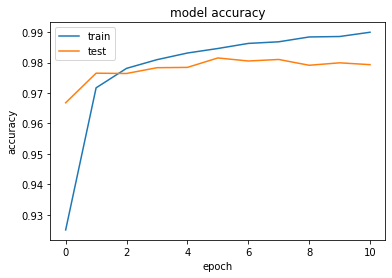

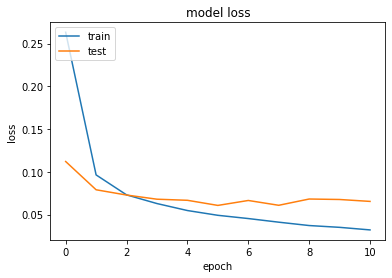

In [77]:
print(metrics.classification_report(y_test, model.predict_classes(X_test)))
print(80*"=")
print(metrics.confusion_matrix(y_test, model.predict_classes(X_test)))
print(80*"=")
utils.plot_curve(history, "accuracy")
print(80*"=")
utils.plot_curve(history, "loss")